In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [3]:
PATH = "/Users/trinakarmakar/anaconda3/data/"
!ls {PATH}

processed                      test_base_pred_new.csv
submission-1218subset1run1.csv test_engineered.csv
submission-2431.csv            testengineered.csv
submission.csv                 train.csv
submission_1228.csv            train_base_pred.csv
submission_24.61.csv           train_base_pred_last.csv
test.csv                       train_base_pred_new.csv
test_base_pred.csv             train_engineered.csv
test_base_pred_last.csv        trainengineered.csv


In [4]:
df_raw = pd.read_csv(f'{PATH}train.csv', low_memory=False)

In [5]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000): 
        with pd.option_context("display.max_columns", 1000): 
            display(df)

In [6]:
display_all(df_raw.tail().transpose())

,4519,4520,4521,4522,4523
Unnamed: 0,4.031000e+03,3.173000e+03,3.388000e+03,4.155000e+03,1.609000e+03
PeerRank,8.888889e+01,5.519481e+01,7.786260e+01,9.230769e+01,2.944984e+01
RankCategory,1.800000e+01,1.000000e+01,1.200000e+01,1.000000e+00,1.100000e+01
period,0.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00
Firm Name,8.800000e+01,3.710000e+02,1.360000e+02,1.650000e+02,4.050000e+02
Name,4.507000e+03,5.407000e+03,1.626000e+03,5.472000e+03,7.202000e+03
Annual Report Net Expense Ratio Year 32,5.200000e-01,1.100000e+00,1.250000e+00,6.500000e-01,1.370000e+00
Annual Report Net Expense Ratio Year 20,5.400000e-01,1.100000e+00,1.250000e+00,6.500000e-01,1.350000e+00
Annual Report Net Expense Ratio Year 8,5.200000e-01,1.100000e+00,1.060000e+00,6.500000e-01,1.290000e+00
Turnover Ratio % Year 32,9.795057e+01,2.800000e+01,5.488000e+01,8.700000e+01,1.590000e+02


In [7]:
display_all(df_raw.describe(include='all').transpose())

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,4524.0,2.261500e+03,1.306111e+03,0.00000,1.130750e+03,2.261500e+03,3.392250e+03,4.523000e+03
PeerRank,4524.0,5.012389e+01,2.905116e+01,0.00000,2.484901e+01,5.000000e+01,7.500000e+01,1.000000e+02
RankCategory,4524.0,1.014854e+01,5.789937e+00,0.00000,5.000000e+00,1.000000e+01,1.400000e+01,2.300000e+01
period,4524.0,1.022104e+00,8.214176e-01,0.00000,0.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00
Firm Name,4524.0,2.221852e+02,1.392679e+02,0.00000,1.050000e+02,2.030000e+02,3.390000e+02,4.820000e+02
Name,4524.0,3.769903e+03,2.188750e+03,1.00000,1.872500e+03,3.795500e+03,5.659500e+03,7.537000e+03
Annual Report Net Expense Ratio Year 32,4524.0,1.063527e+00,4.238588e-01,0.00000,8.000000e-01,1.030000e+00,1.290000e+00,4.260000e+00
Annual Report Net Expense Ratio Year 20,4524.0,1.066183e+00,4.311042e-01,0.00000,8.000000e-01,1.030000e+00,1.300000e+00,4.760000e+00
Annual Report Net Expense Ratio Year 8,4524.0,1.045508e+00,4.175631e-01,-0.01000,7.900000e-01,1.010000e+00,1.260000e+00,4.940000e+00
Turnover Ratio % Year 32,4524.0,9.896788e+01,1.469006e+02,0.00000,3.500000e+01,6.600000e+01,1.100000e+02,2.804000e+03


In [8]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(df_raw.drop('PeerRank', axis=1), df_raw.PeerRank)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [9]:
display_all(df_raw.isnull().sum().sort_index()/len(df_raw))

% Asset in Top Ten Holdings 0                                     0.0
% Asset in Top Ten Holdings 1                                     0.0
% Asset in Top Ten Holdings 10                                    0.0
% Asset in Top Ten Holdings 11                                    0.0
% Asset in Top Ten Holdings 12                                    0.0
% Asset in Top Ten Holdings 13                                    0.0
% Asset in Top Ten Holdings 14                                    0.0
% Asset in Top Ten Holdings 15                                    0.0
% Asset in Top Ten Holdings 16                                    0.0
% Asset in Top Ten Holdings 17                                    0.0
% Asset in Top Ten Holdings 18                                    0.0
% Asset in Top Ten Holdings 19                                    0.0
% Asset in Top Ten Holdings 2                                     0.0
% Asset in Top Ten Holdings 20                                    0.0
% Asset in Top Ten H

In [10]:
df, y, nas = proc_df(df_raw, 'PeerRank')

In [11]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(df, y)
m.score(df,y)

0.83548809169136917

In [12]:
df.head()

,Unnamed: 0,RankCategory,period,Firm Name,Name,Annual Report Net Expense Ratio Year 32,Annual Report Net Expense Ratio Year 20,Annual Report Net Expense Ratio Year 8,Turnover Ratio % Year 32,Turnover Ratio % Year 20,...,Count Board of Directors Fee Amount Year Base Currency,Count Board of Directors Fee Year,Count Annual Report Net Expense Ratio Year,Count Firm % Assets Longest Manager Tenure,Count Firm % Assets Manager Investment,Count Turnover Ratio % Year,Monthly Return Base Currency Median,Monthly Return Base Currency Max,Monthly Return Base Currency Min,Monthly Return Base Currency Zero Crossing Rate
0,3576,9,2,235,7061,0.82,0.84,0.84,20.0,43.0,...,1,1,0,0,0,0,0.750921,6.194191,-5.111542,0.375000
1,1103,8,0,96,898,1.05,1.04,1.03,68.0,33.0,...,0,0,0,0,0,0,0.646499,9.688010,-18.642120,0.383333
2,1411,19,2,88,4513,0.19,0.19,0.18,51.0,109.0,...,0,0,0,0,0,0,0.387630,4.802990,-6.799160,0.408333
3,3930,0,0,231,6936,0.94,0.96,0.91,821.0,589.0,...,0,0,0,0,0,0,0.446690,2.194470,-2.425940,0.400000
4,104,4,1,81,4344,1.25,1.25,1.20,89.0,184.0,...,0,0,0,0,0,0,0.378695,9.470300,-9.183670,0.441667


In [13]:
def split_vals(a,n): 
    return a[:n].copy(), a[n:].copy()

n_valid = 1200  # same as Kaggle's test set size
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((3324, 937), (3324,), (1200, 937))

In [14]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [15]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 22 s, sys: 120 ms, total: 22.1 s
Wall time: 17.4 s
[12.059699097215479, 27.562465183923344, 0.82871903468149399, 0.083628480526978466]


In [16]:
df_trn, y_trn, nas = proc_df(df_raw, 'PeerRank', subset=4000, na_dict=nas)
X_train, _ = split_vals(df_trn, 4000)
y_train, _ = split_vals(y_trn, 4000)

In [17]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 27.1 s, sys: 89.9 ms, total: 27.2 s
Wall time: 18.1 s
[11.903357810994404, 20.364135525480105, 0.83221922879515198, 0.49977266071858906]


In [18]:
#single tree
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[28.17686252708413, 28.103700230133843, 0.059868779188793853, 0.047286157628278813]


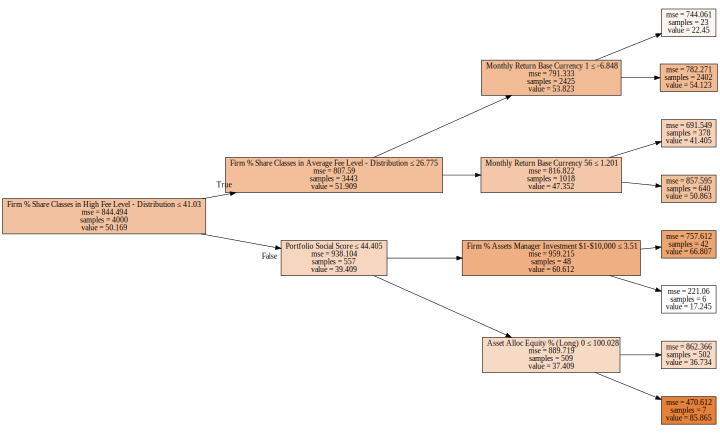

In [19]:
draw_tree(m.estimators_[0], df_trn, precision=3)

In [ ]:
#bigger tree
m = RandomForestRegressor(n_estimators=1, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

In [ ]:
#intro to Bagging
m = RandomForestRegressor(n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

In [ ]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_valid[0]

In [ ]:
preds.shape

In [ ]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(10)]);

In [ ]:
m = RandomForestRegressor(n_estimators=20, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

In [ ]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

In [ ]:
#Out of bag score
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

In [ ]:
df_trn, y_trn, nas = proc_df(df_raw, 'PeerRank')
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)

In [ ]:
set_rf_samples(1000)

In [ ]:
m = RandomForestRegressor(n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

In [ ]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

In [ ]:
reset_rf_samples()

In [ ]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

In [ ]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

In [ ]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

In [ ]:
m = RandomForestRegressor(n_estimators=80, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

In [ ]:
m = RandomForestRegressor(n_estimators=80, n_jobs=-1)
m.fit(df, y)
print_score(m)

In [ ]:
!ls {PATH}

In [ ]:
df_test = pd.read_csv(f'{PATH}test.csv', low_memory=False)
y_pred = m.predict(df_test)

In [ ]:
pred_df = pd.DataFrame({'y_pred': y_pred})

submission = pred_df
submission.sort_index(inplace=True)
submission.loc[submission['y_pred'] < 0, 'y_pred'] = 0
submission.loc[submission['y_pred'] > 100, 'y_pred'] = 100
submission.to_csv("./data/submission.csv", index=False)

In [ ]:
m = RandomForestRegressor(n_estimators=300, min_samples_leaf=3, max_features='auto', n_jobs=-1, oob_score=True)
m.fit(df, y)
print_score(m)

In [ ]:
df_test = pd.read_csv(f'{PATH}test.csv', low_memory=False)
y_pred = m.predict(df_test)

pred_df = pd.DataFrame({'y_pred': y_pred})

submission = pred_df
submission.sort_index(inplace=True)
submission.loc[submission['y_pred'] < 0, 'y_pred'] = 0
submission.loc[submission['y_pred'] > 100, 'y_pred'] = 100
submission.to_csv("./data/submission.csv", index=False)